In [73]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter
import pandas as pd
import io
import itertools
import random

In [6]:
human_chy = '../data/Homo_sapiens.GRCh38.dna_sm.chromosome.Y.fa'
motifs_input = '../data/human_motifs.fa'

In [4]:
def seq_ACGT(seuil_proba, motif,file):
    seq_ACGT = []
    for i in range(0,len(motif), 4):
        seq = motif[i:i+4]
        tmp = []
        if float(seq[0]) >= seuil_proba:
            tmp.append('A')
        if float(seq[1]) >= seuil_proba:
            tmp.append('C')
        if float(seq[2]) >= seuil_proba:
            tmp.append('G')
        if float(seq[3]) >= seuil_proba:
            tmp.append('T')
        seq_ACGT.append(tmp)
    file.write('\n'.join(map(''.join,list(itertools.product(*seq_ACGT)))))
    file.write('\n')

In [5]:
with open(motifs_input) as fasta_file:  # Will close handle cleanly
    identifiers = []
    seq_ADN = []
    lengths = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        identifiers.append(seq_record.id)
        seq_ADN.append(seq_record.seq)
        lengths.append(len(seq_record.seq))
file = open('motifs_ATFG.txt',"w")

motifs = []
for i in range(0,len(seq_ADN)):
    seq = re.findall('\d.\d{6}',str(seq_ADN[i]))
    seq_ACGT(0.25,seq, file)
file.close()

In [7]:
data = pd.read_csv('motifs_ATFG.txt', header = None)


In [8]:
samples_nb = 1000
motifs_df = data.iloc[:2000].sample(n = samples_nb, random_state=42)
motifs_df

0
1860     AACCAGCAGGTGGCGGCGTA
353    GACTATAGCGCCCTCTAGTGGC
1333     AACCACCAGGTGGCGCCGTT
905   GCCGCCATCTTGATTGGGGCCGG
1289     AACCACCAGGGGGCGGTATT
...                       ...
25                 GGGAAATGTA
1858     AACCAGCAGGTGGCGGCGGA
714    TGCAATAGTGCCCTCTAGTGGT
1009  GCCGCCATGTTGATTACGGCCGG
193           TTCCGATTGGCCGAC

[1000 rows x 1 columns]

Longueur minimum d"un motif :  10
Longueur maximal d"un motif :  23


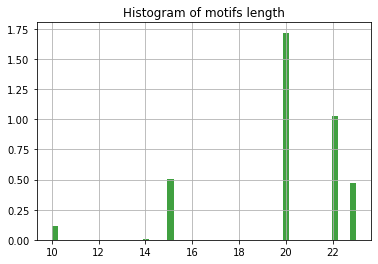

In [9]:
# the histogram of motifs length
x = [len(motifs_df.iat[i,0]) for i in range(0,len(motifs_df.index))]
min_len_motif = min(x)
max_len_motif = max(x)
print('Longueur minimum d"un motif : ', min(x))
print('Longueur maximal d"un motif : ', max(x))
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)
plt.title('Histogram of motifs length')
plt.grid(True)
plt.show()

In [10]:
len_motifs = pd.DataFrame(x)
len_motifs.value_counts(ascending=True)

14      1
10     30
23    122
15    132
22    268
20    447
dtype: int64

In [12]:
nucl_counts = dict()
for i in range(0,len(motifs_df.index)):
  for i in motifs_df.iat[i,0]:
    nucl_counts[i] = nucl_counts.get(i, 0) + 1
nucl_counts

{'A': 4620, 'C': 5272, 'G': 5972, 'T': 4072}

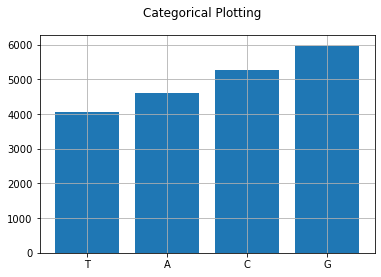

In [13]:
nucl_counts_sorted = { k : v for k, v in sorted(nucl_counts.items(), key=lambda item: item[1])}

names = list(nucl_counts_sorted.keys())
values = list(nucl_counts_sorted.values())

plt.bar(names, values)
plt.suptitle('Categorical Plotting')
plt.grid()
plt.show()

In [48]:
#dire si une séquence est ou non motif

def est_motif(motifs_df,seq,seuil):
    n,m = len(motifs_df.index),len(seq)
    for i in range(n):
        cur_dist = 0
        if len(motifs_df.iat[i,0]) == m:
            for j in range(m):
                if motifs_df.iloc[i,0][j] == 'A' and seq[j] != 'A':
                    cur_dist +=1
                    #print("incrémente 1")
                elif motifs_df.iloc[i,0][j] == 'T' and seq[j] != 'T':
                    cur_dist +=1
                    #print("incrémente 2")
                elif motifs_df.iloc[i,0][j] == 'G' and seq[j] != 'G':
                    cur_dist +=1
                    #print("incrémente 3")
                elif motifs_df.iloc[i,0][j] == 'C' and seq[j] != 'C':
                    cur_dist +=1
                    #print("incrémente 4")
                #print('cur dist '+str(cur_dist)+ ' and '+' %'+str(int(seuil*m)+1))
    
            if cur_dist <= int(seuil*m)+1:
                return True
    return False

In [16]:
est_motif(motifs_df, 'GGCCGGGCGC', 0.1)

cur dist 0 and  %2
cur dist 1 and  %2
cur dist 2 and  %2
cur dist 3 and  %2
cur dist 4 and  %2
cur dist 5 and  %2
cur dist 6 and  %2
cur dist 7 and  %2
cur dist 8 and  %2
cur dist 9 and  %2
cur dist 1 and  %2
cur dist 2 and  %2
cur dist 3 and  %2
cur dist 4 and  %2
cur dist 5 and  %2
cur dist 6 and  %2
cur dist 7 and  %2
cur dist 8 and  %2
cur dist 8 and  %2
cur dist 8 and  %2
cur dist 0 and  %2
cur dist 1 and  %2
cur dist 2 and  %2
cur dist 3 and  %2
cur dist 4 and  %2
cur dist 5 and  %2
cur dist 6 and  %2
cur dist 7 and  %2
cur dist 8 and  %2
cur dist 8 and  %2
cur dist 0 and  %2
cur dist 1 and  %2
cur dist 2 and  %2
cur dist 3 and  %2
cur dist 4 and  %2
cur dist 4 and  %2
cur dist 5 and  %2
cur dist 5 and  %2
cur dist 6 and  %2
cur dist 6 and  %2
cur dist 1 and  %2
cur dist 2 and  %2
cur dist 3 and  %2
cur dist 3 and  %2
cur dist 3 and  %2
cur dist 4 and  %2
cur dist 4 and  %2
cur dist 5 and  %2
cur dist 5 and  %2
cur dist 6 and  %2
cur dist 1 and  %2
cur dist 2 and  %2
cur dist 3 a

False

On prend la séquence d'adn du chromosome Y et on le met en majuscule

In [17]:
with open(human_chy) as fasta_file:  # Will close handle cleanly
    identifiers = []
    seq_ADN = []
    lengths = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        identifiers.append(seq_record.id)
        seq_ADN.append(seq_record.seq)
        lengths.append(len(seq_record.seq))
seq_ADN = str(seq_ADN[0])
seq_ADN = seq_ADN.upper()

In [18]:
i = 0
while seq_ADN[i] == 'N': 
    i+=1
seq_ADN = seq_ADN[i:]

In [19]:
seq_ADN[0:4]

'GGCC'

A présent, on a notre séquence d'adn dans une string et on a enlevé tous les N du début

In [84]:
def random_selection(liste_motifs,seq_ADN,seuil):
    non_motif_list = []
    x = [len(liste_motifs.iat[i,0]) for i in range(0,len(liste_motifs.index))]
    min_len_motif = min(x)
    max_len_motif = max(x)
    bLen = False
    while bLen == False:
        for i in range(0,len(seq_ADN)):
            random_len = random.randint(min_len_motif,max_len_motif)
            print('random len :',random_len)
            print('longueur de la liste :', len(non_motif_list))
            if est_motif(liste_motifs,seq_ADN[i:i+random_len],seuil) == False and seq_ADN[i:i+random_len] not in non_motif_list: #On ajoute ce non-motif à la liste
                non_motif_list.append(seq_ADN[i:i+random_len])
            if len(non_motif_list) >= len(liste_motifs):
                bLen = True
                break

            
    return non_motif_list

    

In [85]:
non_motif_list = random_selection(motifs_df, seq_ADN, 0.2)
non_motif_list

random len : 18
longueur de la liste : 0
random len : 18
longueur de la liste : 1
random len : 22
longueur de la liste : 2
random len : 15
longueur de la liste : 3
random len : 19
longueur de la liste : 4
random len : 13
longueur de la liste : 5
random len : 14
longueur de la liste : 6
random len : 23
longueur de la liste : 7
random len : 22
longueur de la liste : 8
random len : 12
longueur de la liste : 9
random len : 10
longueur de la liste : 10
random len : 17
longueur de la liste : 11
random len : 21
longueur de la liste : 12
random len : 21
longueur de la liste : 13
random len : 14
longueur de la liste : 14
random len : 13
longueur de la liste : 15
random len : 14
longueur de la liste : 16
random len : 23
longueur de la liste : 17
random len : 18
longueur de la liste : 18
random len : 15
longueur de la liste : 19
random len : 12
longueur de la liste : 20
random len : 23
longueur de la liste : 21
random len : 17
longueur de la liste : 22
random len : 16
longueur de la liste : 23
ra

['GGCCGGGCGCGGTGGCTC',
 'GCCGGGCGCGGTGGCTCA',
 'CCGGGCGCGGTGGCTCACGCCT',
 'CGGGCGCGGTGGCTC',
 'GGGCGCGGTGGCTCACGCC',
 'GGCGCGGTGGCTC',
 'GCGCGGTGGCTCAC',
 'CGCGGTGGCTCACGCCTGTAATC',
 'GCGGTGGCTCACGCCTGTAATC',
 'CGGTGGCTCACG',
 'GGTGGCTCAC',
 'GTGGCTCACGCCTGTAA',
 'TGGCTCACGCCTGTAATCCCA',
 'GGCTCACGCCTGTAATCCCAG',
 'GCTCACGCCTGTAA',
 'CTCACGCCTGTAA',
 'TCACGCCTGTAATC',
 'CACGCCTGTAATCCCAGCACTTT',
 'ACGCCTGTAATCCCAGCA',
 'CGCCTGTAATCCCAG',
 'GCCTGTAATCCC',
 'CCTGTAATCCCAGCACTTTGGGA',
 'CTGTAATCCCAGCACTT',
 'TGTAATCCCAGCACTT',
 'GTAATCCCAGC',
 'TAATCCCAGCACTTTGGGAGGC',
 'AATCCCAGCACTTTGGGAGGC',
 'ATCCCAGCACTTTGGGAG',
 'TCCCAGCACTTTGGG',
 'CCCAGCACTTTGGGAGGCCAAG',
 'CCAGCACTTTGGG',
 'CAGCACTTTGGGAGG',
 'AGCACTTTGGGAGGCCAAGA',
 'GCACTTTGGGAGG',
 'CACTTTGGGAGG',
 'ACTTTGGGAGGCCAAGATG',
 'CTTTGGGAGGCCAAG',
 'TTTGGGAGGCCA',
 'TTGGGAGGCCAAGATGG',
 'TGGGAGGCCA',
 'GGGAGGCCAAGATGG',
 'GGAGGCCAAGATGGGCGG',
 'GAGGCCAAGAT',
 'AGGCCAAGATG',
 'GGCCAAGATGGGCGGATCACGAG',
 'GCCAAGATGGGCGGATCA',
 'CCAAGAT

In [29]:
def rolling_stone(liste_motifs,seq_ADN,seuil):
    non_motif_list = []
    x = [len(liste_motifs.iat[i,0]) for i in range(0,len(liste_motifs.index))]
    min_len_motif = min(x)
    max_len_motif = max(x)
    batchsize = max_len_motif - min_len_motif
    
    for i in range(0,len(seq_ADN), batchsize):
        batch = seq_ADN[i: i+batchsize]
        for j in range(0,batchsize-min_len_motif):
            if est_motif(liste_motifs,batch[0:j+min_len_motif],seuil) == False and batch[0:j+min_len_motif] not in non_motif_list: #On ajoute ce non-motif à la liste
                non_motif_list.append(batch[0:j+min_len_motif])
                break
            if len(non_motif_list) >= 1000:
                break
        if len(non_motif_list) >= 1000:
                max_i = i
                break
    print('max i : ',max_i)      
    return non_motif_list



In [30]:
non_motif_list = rolling_stone(motifs_df, seq_ADN, 0.2)

cur dist 0 and  %3
cur dist 1 and  %3
cur dist 2 and  %3
cur dist 3 and  %3
cur dist 4 and  %3
cur dist 5 and  %3
cur dist 6 and  %3
cur dist 7 and  %3
cur dist 8 and  %3
cur dist 9 and  %3
cur dist 1 and  %3
cur dist 2 and  %3
cur dist 3 and  %3
cur dist 4 and  %3
cur dist 5 and  %3
cur dist 6 and  %3
cur dist 7 and  %3
cur dist 8 and  %3
cur dist 8 and  %3
cur dist 8 and  %3
cur dist 0 and  %3
cur dist 1 and  %3
cur dist 2 and  %3
cur dist 3 and  %3
cur dist 4 and  %3
cur dist 5 and  %3
cur dist 6 and  %3
cur dist 7 and  %3
cur dist 8 and  %3
cur dist 8 and  %3
cur dist 0 and  %3
cur dist 1 and  %3
cur dist 2 and  %3
cur dist 3 and  %3
cur dist 4 and  %3
cur dist 4 and  %3
cur dist 5 and  %3
cur dist 5 and  %3
cur dist 6 and  %3
cur dist 6 and  %3
cur dist 1 and  %3
cur dist 2 and  %3
cur dist 3 and  %3
cur dist 3 and  %3
cur dist 3 and  %3
cur dist 4 and  %3
cur dist 4 and  %3
cur dist 5 and  %3
cur dist 5 and  %3
cur dist 6 and  %3
cur dist 1 and  %3
cur dist 2 and  %3
cur dist 3 a

In [86]:
len(non_motif_list)

1000

Longueur minimum d"un motif :  10
Longueur maximal d"un motif :  23


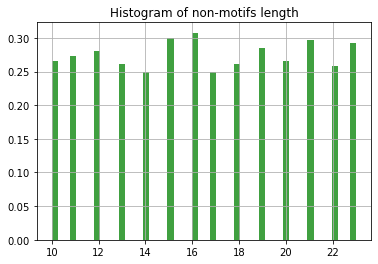

In [87]:
# the histogram of motifs length
x = [len(non_motif_list[i]) for i in range(0,len(non_motif_list))]
print('Longueur minimum d"un motif : ', min(x))
print('Longueur maximal d"un motif : ', max(x))
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)
plt.title('Histogram of non-motifs length')
plt.grid(True)
plt.show()